Import the necessary libraries

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Read the file 

In [36]:
df = pd.read_csv("datasets/StudentsPerformance.csv")

In [37]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [38]:
# find data set shape
df.shape

(1000, 8)

From the above code we can infer the following:
The features of the dataset are -
1. Gender 
2. race/ethinicity
3. parental level of education
4. lunch
5. test preparation
6. math score
7. reading score
8. writing score

Data checks to perform
1. Check Missing Values
2. Check duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories present in the different categorical column

In [39]:
df.isna().sum()
# there are no missing values 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [40]:
df.duplicated().sum()
# there are no duplicates in this dataset

0

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [42]:
# find the unique values in each feature
# this gives us the different categories in each ffeatures
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [43]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [44]:
print("Categories in gender feature: ", df['gender'].unique())
print("Categories in race/ethinicity feature: ", df['race/ethnicity'].unique())
print("Categories in parental level of education feature: ", df['parental level of education'].unique())
print("Categories in lunch feature: ", df['lunch'].unique())
print("Categories in test preparation course feature: ", df['test preparation course'].unique())

Categories in gender feature:  ['female' 'male']
Categories in race/ethinicity feature:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education feature:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch feature:  ['standard' 'free/reduced']
Categories in test preparation course feature:  ['none' 'completed']


Draw Insight from the above

1. There are 1000 scores
2. The mean for all values are between 66 to 69
3. Standard deviations are close - between 14.6 to 15.19
4. there are 3 numerical features -> math, reading and writing score
5. There are 5 categorical features 
6. Gender -> Male, Female
7. Race/ethnicity -> 'group B' 'group C' 'group A' 'group D' 'group E'
8. Parental level of education -> "bachelor's degree" 'some college' "master's degree" "associate's degree" 'high school' 'some high school'
9. lunch ->  ['standard' 'free/reduced']
10. test preparation course ->  ['none' 'completed']
11. the least score is in math and the highest is in reading

Add Column for Total score and Average

In [45]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# Visualization

We can use histograms and Kernel Distribution function

<Axes: xlabel='average', ylabel='Count'>

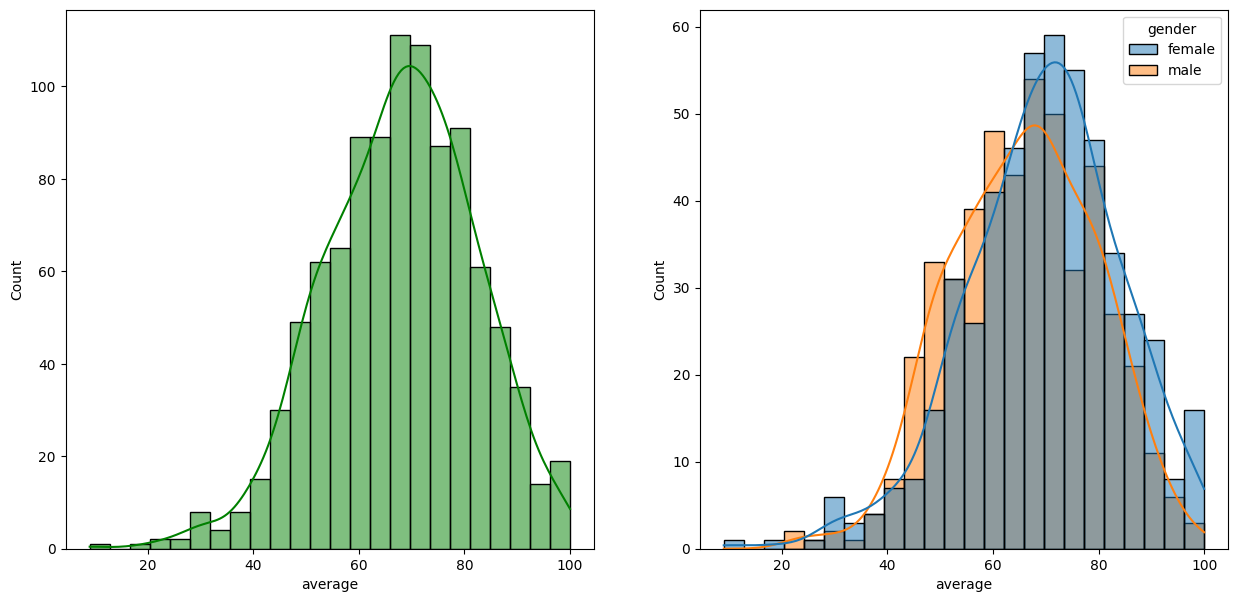

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')

<Axes: xlabel='total score', ylabel='Count'>

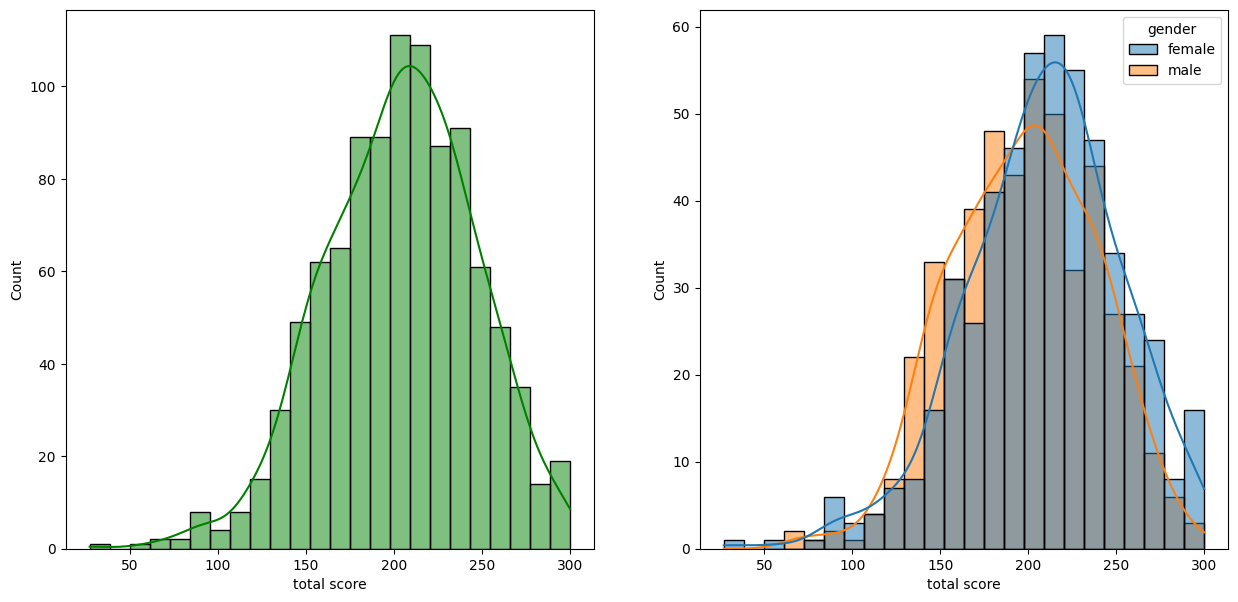

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')

We are checking the average score based on the lunch feature.

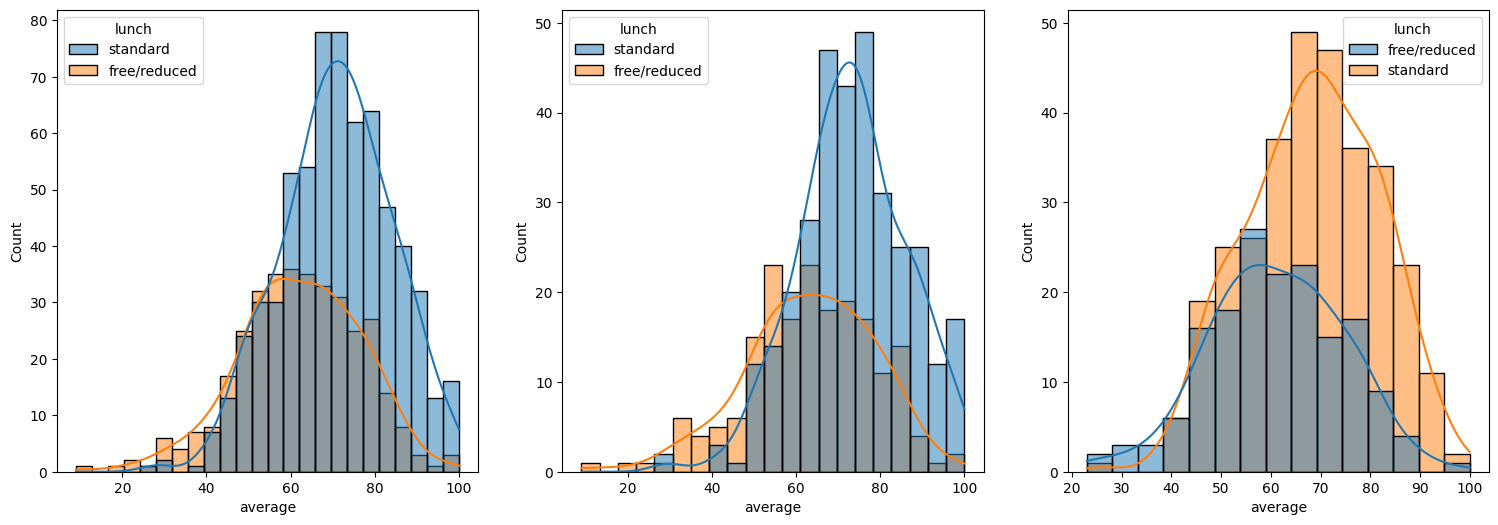

In [48]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data= df[df.gender == 'male'], x='average', kde = True, hue ='lunch')
plt.show()

The standard lunch allows for increased average scores for both male and female

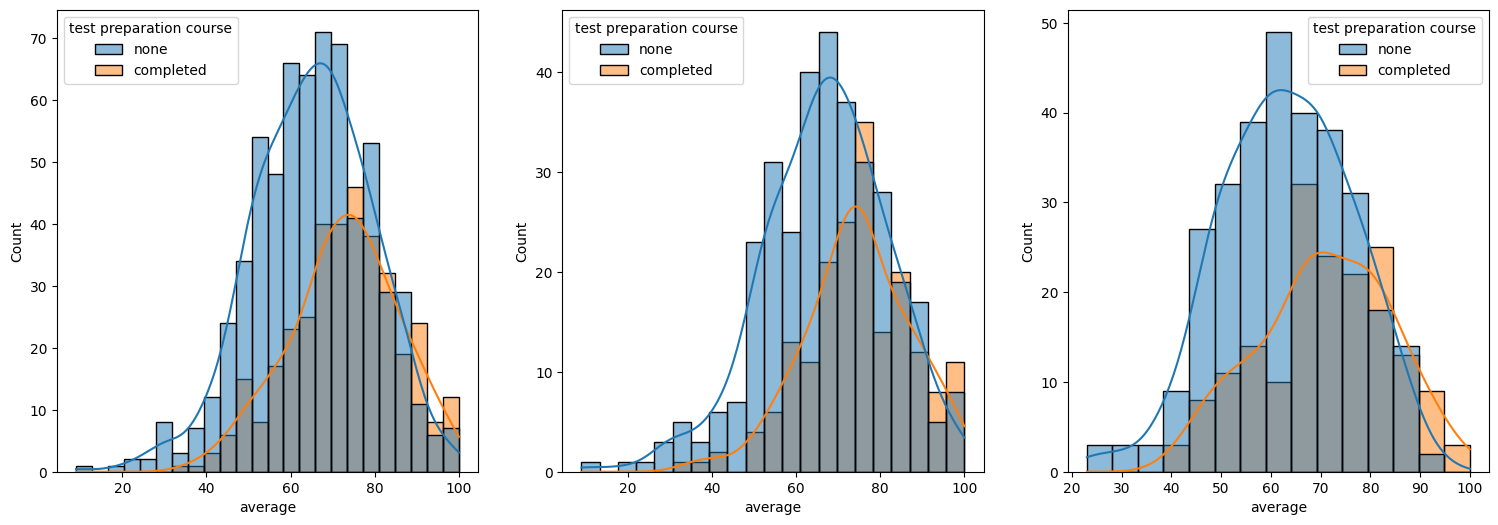

In [49]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'test preparation course')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='test preparation course')
plt.subplot(143)
sns.histplot(data= df[df.gender == 'male'], x='average', kde = True, hue ='test preparation course')
plt.show()

Students who have completed test preparation courses perform slightly better

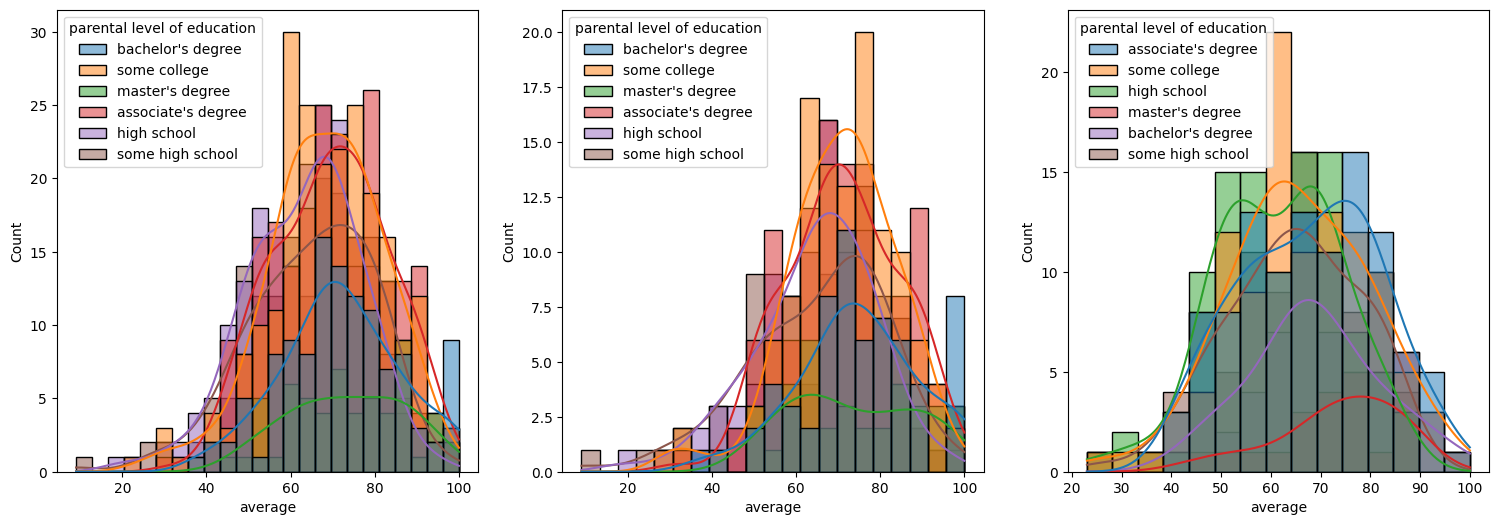

In [50]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data= df[df.gender == 'male'], x='average', kde = True, hue ='parental level of education')
plt.show()

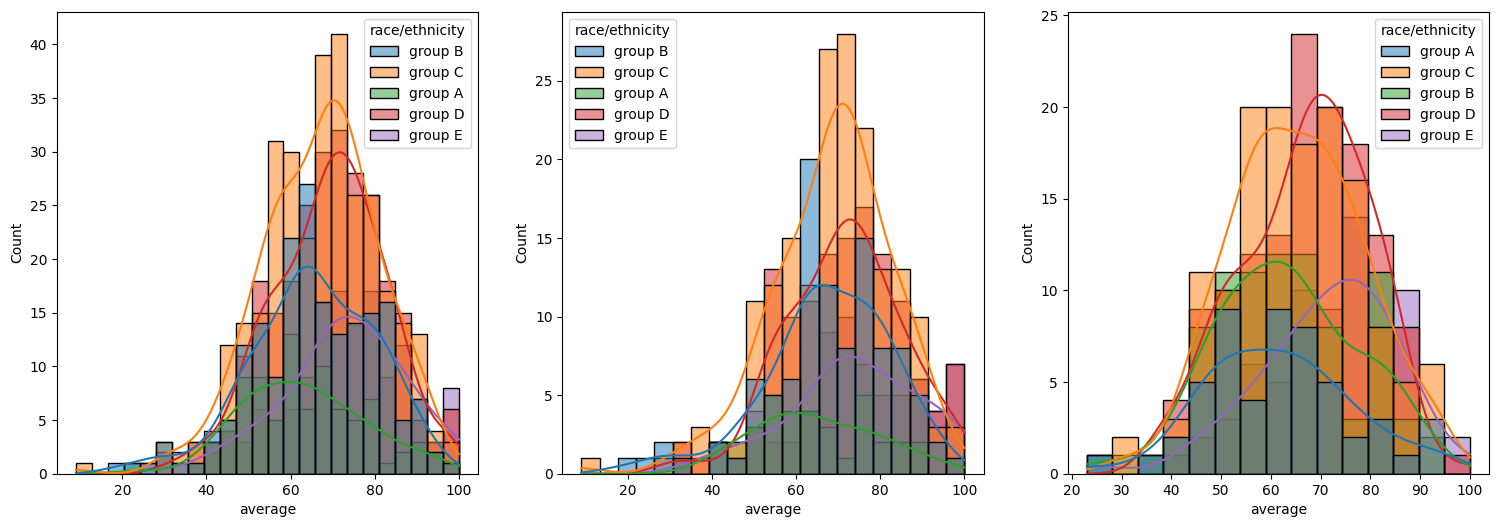

In [51]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data= df[df.gender == 'male'], x='average', kde = True, hue ='race/ethnicity')
plt.show()

Students is Group B and Group A are performing lower than the other groups

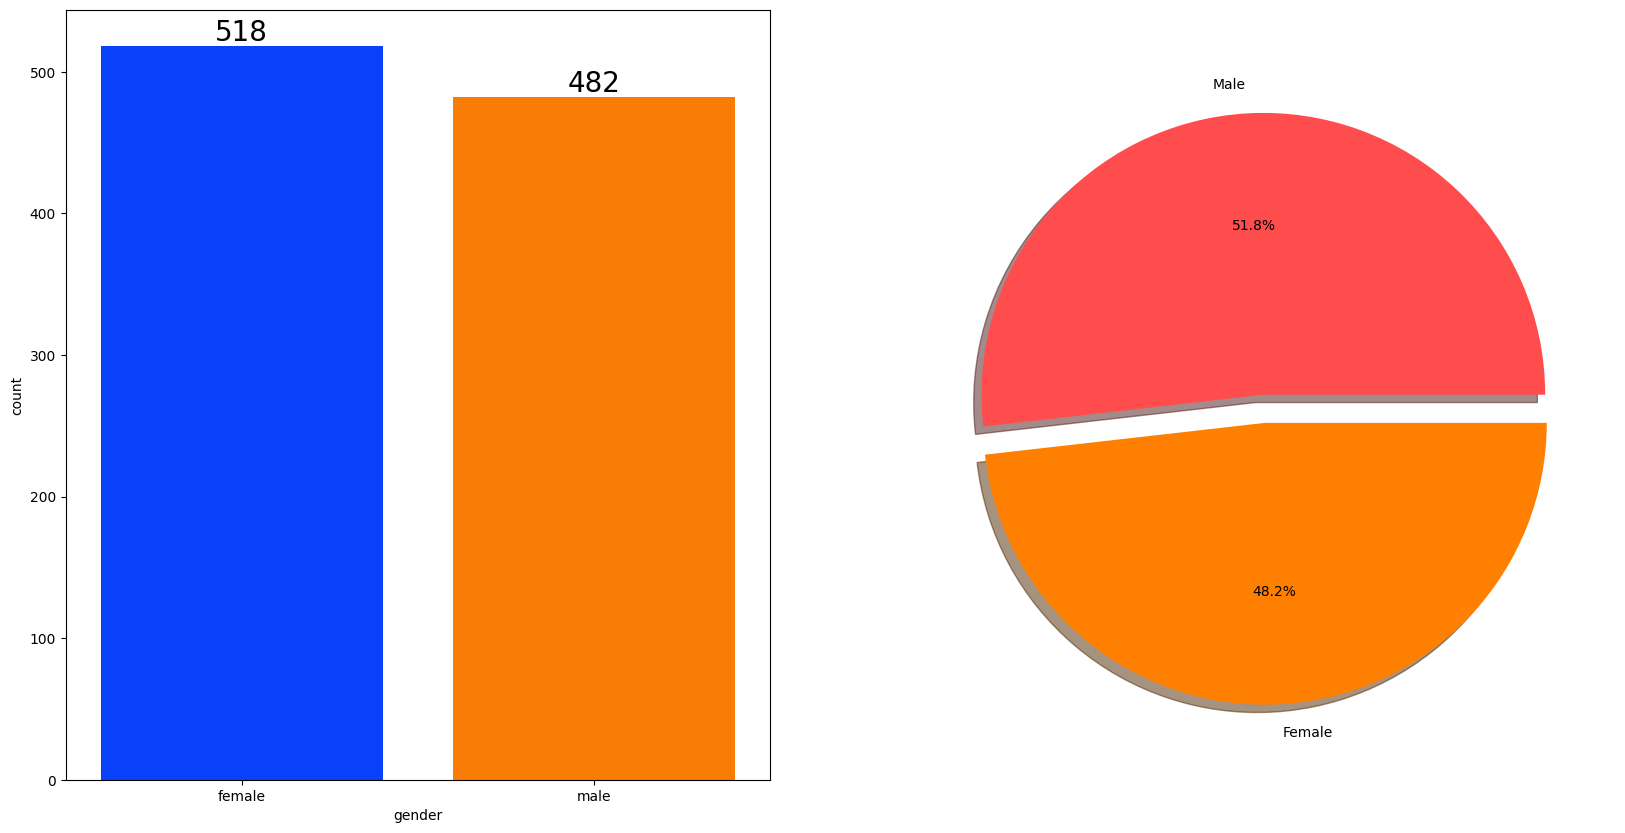